In [1]:
import pandas as pd

df = pd.read_csv('translated_data.csv')

In [2]:
df['categories_list'] = df['categories'].apply(lambda x: x.split(", "))

In [ ]:
corrections = {
    "и кластерные вычисления": "Распределённые и кластерные вычисления",
    "и наука": "Компьютеры и общество"
}


df['categories_list'] = df['categories_list'].apply(
    lambda x: [corrections.get(cat.strip(), cat.strip()) for cat in x]
)

In [ ]:

df['categories'] = df['categories_list'].apply(lambda x: ", ".join(x))

In [5]:
split_categories = df['categories'].str.split(',')
all_categories = [category.strip() for categories_list in split_categories for category in categories_list]


In [7]:
from collections import Counter

category_counts = Counter(all_categories)
category_counts_df = pd.DataFrame.from_dict(category_counts, orient='index', columns=['count'])
category_counts_df = category_counts_df.sort_values(by='count', ascending=False)

print(category_counts_df.head(30))

                                             count
Машинное обучение                            58056
Искусственный интеллект                      40946
Компьютерное зрение и распознавание образов  23512
Вычисления и язык                            20696
Компьютеры и общество                        20000
Криптография и безопасность                  15303
Структуры данных и алгоритмы                 14284
Распределённые системы                       13407
Распределённые и кластерные вычисления       13407
Параллельные вычисления                      13407
Робототехника                                12832
Теория информации                            12164
Логика в информатике                         12110
Человеко-компьютерное взаимодействие         11985
Информационный поиск                         11626
Программная инженерия                        11590
Сети и архитектура интернета                 11332
Социальные и информационные сети             11132
Дискретная математика          

In [ ]:
min_examples = 5000


popular_categories = {cat for cat, count in category_counts.items() if count >= min_examples}

print(f"Количество популярных меток: {len(popular_categories)}")
print("Популярные метки:", popular_categories)

Количество популярных меток: 40
Популярные метки: {'Информационный поиск', 'Вычислительная сложность', 'Цифровые библиотеки', 'Информатика и теория игр', 'Графика', 'Формальные языки и теория автоматов', 'Сети и архитектура интернета', 'Вычислительная инженерия', 'Архитектура оборудования', 'Социальные и информационные сети', 'Базы данных', 'Логика в информатике', 'Вычисления и язык', 'Системы и управление', 'Комбинаторика', 'Перспективные технологии', 'Вычислительная геометрия', 'Робототехника', 'Обработка звука и речи', 'Машинное обучение', 'Программная инженерия', 'Звук', 'Языки программирования', 'Теория информации', 'Компьютерное зрение и распознавание образов', 'Структуры данных и алгоритмы', 'Оптимизация и управление', 'Финансы', 'Параллельные вычисления', 'Распределённые системы', 'Криптография и безопасность', 'Распределённые и кластерные вычисления', 'Мультиагентные системы', 'Компьютеры и общество', 'Человеко-компьютерное взаимодействие', 'Искусственный интеллект', 'Дискретн

In [ ]:

df['categories_list'] = df['categories'].apply(lambda x: x.split(", "))

In [ ]:
popular_categories = {
    "Информационный поиск", "Вычислительная сложность", "Цифровые библиотеки",
    "Информатика и теория игр", "Графика", "Формальные языки и теория автоматов",
    "Сети и архитектура интернета", "Вычислительная инженерия", "Архитектура оборудования",
    "Социальные и информационные сети", "Базы данных", "Логика в информатике",
    "Вычисления и язык", "Системы и управление", "Комбинаторика", "Перспективные технологии",
    "Вычислительная геометрия", "Робототехника", "Обработка звука и речи", "Машинное обучение",
    "Программная инженерия", "Звук", "Языки программирования", "Теория информации",
    "Компьютерное зрение и распознавание образов", "Структуры данных и алгоритмы",
    "Оптимизация и управление", "Финансы", "Параллельные вычисления", "Распределённые системы",
    "Криптография и безопасность", "Распределённые и кластерные вычисления",
    "Мультиагентные системы", "Компьютеры и общество", "Человеко-компьютерное взаимодействие",
    "Искусственный интеллект", "Дискретная математика", "Нейронные и эволюционные вычисления",
    "Мультимедиа", "Обработка сигналов"
}


df['filtered_categories'] = df['categories_list'].apply(
    lambda x: [cat for cat in x if cat in popular_categories]
)

In [ ]:

df_filtered = df[df['filtered_categories'].apply(len) > 0].reset_index(drop=True)

print(f"Исходный размер датасета: {len(df)}")
print(f"Размер датасета после фильтрации: {len(df_filtered)}")

Исходный размер датасета: 246869
Размер датасета после фильтрации: 241265


In [ ]:

unique_categories = set([cat for categories in df_filtered['filtered_categories'] for cat in categories])
print(len(unique_categories))
print("Уникальные категории после фильтрации:", unique_categories)

40
Уникальные категории после фильтрации: {'Информационный поиск', 'Вычислительная сложность', 'Цифровые библиотеки', 'Информатика и теория игр', 'Графика', 'Формальные языки и теория автоматов', 'Сети и архитектура интернета', 'Вычислительная инженерия', 'Архитектура оборудования', 'Социальные и информационные сети', 'Базы данных', 'Логика в информатике', 'Вычисления и язык', 'Системы и управление', 'Комбинаторика', 'Перспективные технологии', 'Вычислительная геометрия', 'Робототехника', 'Обработка звука и речи', 'Машинное обучение', 'Программная инженерия', 'Звук', 'Языки программирования', 'Теория информации', 'Компьютерное зрение и распознавание образов', 'Структуры данных и алгоритмы', 'Оптимизация и управление', 'Финансы', 'Параллельные вычисления', 'Распределённые системы', 'Криптография и безопасность', 'Распределённые и кластерные вычисления', 'Мультиагентные системы', 'Компьютеры и общество', 'Человеко-компьютерное взаимодействие', 'Искусственный интеллект', 'Дискретная матем

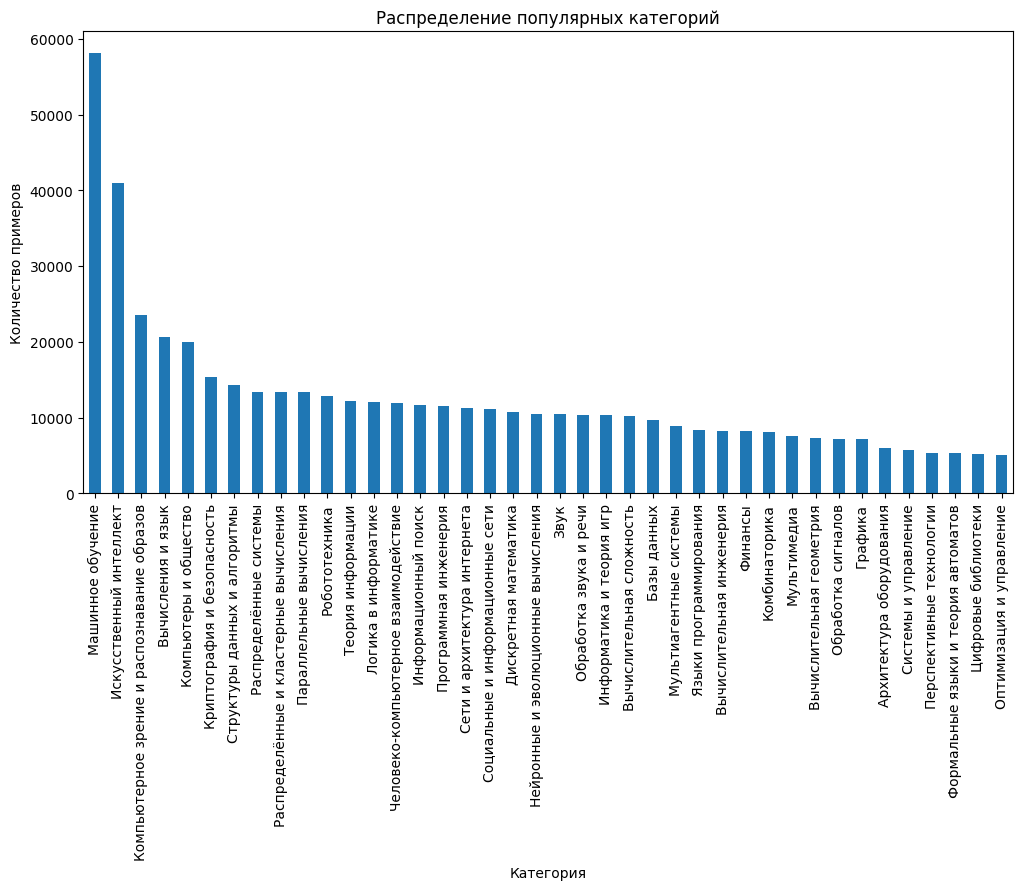

In [ ]:
import matplotlib.pyplot as plt


filtered_categories = [cat for categories in df_filtered['filtered_categories'] for cat in categories]
category_counts = pd.Series(filtered_categories).value_counts()


plt.figure(figsize=(12, 6))
category_counts.plot(kind='bar')
plt.title('Распределение популярных категорий')
plt.xlabel('Категория')
plt.ylabel('Количество примеров')
plt.xticks(rotation=90)
plt.show()

In [19]:
df_filtered.head()

,translated_title,translated_summary,categories,categories_list,filtered_categories
0,"Представительство, функциональность и натурали...",В статье анализируются основополагающие принци...,"Искусственный интеллект, Робототехника","[Искусственный интеллект, Робототехника]","[Искусственный интеллект, Робототехника]"
1,NeuroChat: Нейродорожный AI Chatbot для адапта...,"В то же время, электроэнцефалические (ЭЕГ) ней...","Человеко-компьютерное взаимодействие, Искусств...","[Человеко-компьютерное взаимодействие, Искусст...","[Человеко-компьютерное взаимодействие, Искусст..."
2,Денонсация Гамильтонской сети физических обосн...,Системы машинного обучения для физических проб...,"Машинное обучение, Искусственный интеллект","[Машинное обучение, Искусственный интеллект]","[Машинное обучение, Искусственный интеллект]"
3,"Сначала снимки фильтров, затем генерировать ин...",Визуальная инструктирование (VIT) для моделей ...,"Компьютерное зрение и распознавание образов, И...","[Компьютерное зрение и распознавание образов, ...","[Компьютерное зрение и распознавание образов, ..."
4,Когда модель Большого Видения и Лангуажа совпа...,Эффективное понимание с помощью языка зрения к...,"Компьютерное зрение и распознавание образов, И...","[Компьютерное зрение и распознавание образов, ...","[Компьютерное зрение и распознавание образов, ..."


In [23]:
final_df = df_filtered[['translated_title', 'translated_summary', 'filtered_categories']]

In [24]:
final_df.head()

,translated_title,translated_summary,filtered_categories
0,"Представительство, функциональность и натурали...",В статье анализируются основополагающие принци...,"[Искусственный интеллект, Робототехника]"
1,NeuroChat: Нейродорожный AI Chatbot для адапта...,"В то же время, электроэнцефалические (ЭЕГ) ней...","[Человеко-компьютерное взаимодействие, Искусст..."
2,Денонсация Гамильтонской сети физических обосн...,Системы машинного обучения для физических проб...,"[Машинное обучение, Искусственный интеллект]"
3,"Сначала снимки фильтров, затем генерировать ин...",Визуальная инструктирование (VIT) для моделей ...,"[Компьютерное зрение и распознавание образов, ..."
4,Когда модель Большого Видения и Лангуажа совпа...,Эффективное понимание с помощью языка зрения к...,"[Компьютерное зрение и распознавание образов, ..."


In [25]:
final_df.to_csv("final_dataset.csv", index=False, encoding="utf-8")